### Babies per woman vs Children mortality.

<br>

#### General setup.
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

import re
import mailbox
import csv

%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

<br>

#### Load the data set.
___

In [3]:
gapminder = pd.read_csv('../Data/gapminder.csv')
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [4]:
gapminder.tail()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
14735,Zimbabwe,2011,Africa,14255592.0,51.6,90.80,3.64,1626.0,4.451745
14736,Zimbabwe,2012,Africa,14565482.0,54.2,91.33,3.56,1750.0,4.791239
14737,Zimbabwe,2013,Africa,14898092.0,55.7,91.67,3.49,1773.0,4.854209
14738,Zimbabwe,2014,Africa,15245855.0,57.0,91.90,3.41,1773.0,4.854209
14739,Zimbabwe,2015,Africa,15602751.0,59.3,92.04,3.35,1801.0,4.930869


In [5]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
# Select every 20th row up to 200
gapminder.loc[0:200:20]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
20,Afghanistan,1955,Asia,8270024.0,29.27,60.193,7.67,1125.0,3.080082
40,Afghanistan,1975,Asia,12582954.0,39.61,72.060,7.67,1201.0,3.288159
60,Afghanistan,1995,Asia,16772522.0,49.40,84.770,7.83,872.0,2.387406
80,Afghanistan,2015,Asia,32526562.0,53.80,90.890,4.47,1925.0,5.270363
100,Albania,1954,Europe,1382881.0,56.59,84.829,6.31,2108.0,5.771389
120,Albania,1974,Europe,2358467.0,69.35,90.082,4.54,4177.0,11.436003
140,Albania,1994,Europe,3140634.0,73.60,96.540,2.77,3457.0,9.464750
160,Albania,2014,Europe,2889676.0,77.90,98.560,1.78,10160.0,27.816564
180,Algeria,1953,Africa,9405445.0,43.96,73.758,7.65,4077.0,11.162218


<br>

#### Data visualization
___

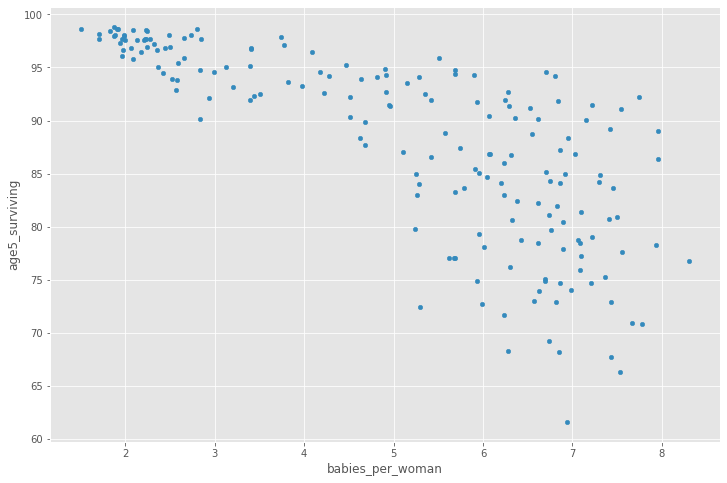

In [7]:
# Plot the number of children vs Surviving under age 5 for the year 1973
gapminder[gapminder.year == 1973].plot.scatter('babies_per_woman', 'age5_surviving')
plt.show()

The plot above shows that women had more children when they had less chances of surviving. 

In [8]:
def plot_year(year):
    """ Add sizing and colour to the plot """
    # Data per year
    data = gapminder[gapminder.year == year]
    
    # Size the points per area population (scaled)
    area = 5e-6 * data.population
    
    # Create a colour map per region
    colours = data.region.map({'Africa': 'skyblue', 'Europe': 'darkgreen', 
                               'Asia': 'coral', 'America': 'gold'})
    # Plot the data
    data.plot.scatter('babies_per_woman', 'age5_surviving', 
                      s=area, c=colours, edgecolor='k', linewidth=1)
    
    # Limit the axis and change labels
    plt.axis(xmin=0, xmax=10, ymin=50, ymax=105)
    plt.xlabel('Babies per woman')
    plt.ylabel('% children alive at age 5')

In [9]:
# Create an interactive plot using jupyter widgets
interact(plot_year, year=widgets.IntSlider(min=1950, max=2015, step=1, value=1973))

interactive(children=(IntSlider(value=1973, description='year', max=2015, min=1950), Output()), _dom_classes=(…

<function __main__.plot_year(year)>

<br>
___

#### End.